<a href="https://colab.research.google.com/github/anacarolgarcia/samugigamap/blob/main/An%C3%A1lise_em_Phyton_Gigamap_SAMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kumu-carolgarcia-mapa-sistemico-do-samu-rio-durante-aph-de-casos-avancados.json to kumu-carolgarcia-mapa-sistemico-do-samu-rio-durante-aph-de-casos-avancados.json


In [5]:
import json
import pandas as pd

filename = list(uploaded.keys())[0]

with open(filename) as f:
    data = json.load(f)

print("Chaves principais do JSON:", data.keys())

Chaves principais do JSON: dict_keys(['version', 'name', 'description', 'proxyImages', 'defaultMap', 'defaultPerspective', 'attributeRelevance', 'attributes', 'elements', 'connections', 'loops', 'maps', 'perspectives'])


In [6]:
elements = pd.json_normalize(data['elements'])

connections = pd.json_normalize(data['connections'])

print("Elementos (nós):")
display(elements.head())

print("Conexões (links):")
display(connections.head())


Elementos (nós):


,_id,attributes.label,attributes.element type,attributes.degree,attributes.metrics::last,attributes.tags,attributes.description,attributes.image,attributes.indegree,attributes.outdegree
0,elem-0Hxz4YXQ,Ministério da Previdência,Governance,1,1,[Governance],NaN,NaN,NaN,NaN
1,elem-0JFHpZoL,Queda,Paciente,1,1,[Casos graves],NaN,NaN,NaN,NaN
2,elem-0c4ySdNm,Contratos,Commerce,1,1,NaN,NaN,NaN,NaN,NaN
3,elem-15WDuhbf,Paciente,User,4,1,[User],"Pacientes de casos avançados (USA), foco deste...",,7.0,1.0
4,elem-15ncMEEd,Tentativa de suicídio,Paciente,1,1,[Casos graves],NaN,NaN,NaN,NaN


Conexões (links):


,_id,direction,delayed,reversed,from,to,attributes.connection type,attributes.tags,attributes.description,attributes.postlabel
0,conn-09u2sPix,undirected,False,False,elem-6s9LAWqA,elem-KsqJJVtq,NaN,NaN,NaN,NaN
1,conn-0C3JnV9y,directed,False,False,elem-kf4GG3HK,elem-4daCpnFb,Relações Sociais Institucionais (SOIR),NaN,NaN,NaN
2,conn-0C6C6Ejn,directed,False,False,elem-tYUswrOp,elem-15WDuhbf,Relações Sociais de Ação (SASR)/Relações Socia...,NaN,NaN,NaN
3,conn-0Xr9Yc0W,undirected,False,False,elem-zB7sTM7s,elem-Bjt8hRgQ,NaN,NaN,NaN,NaN
4,conn-0edGmcFT,undirected,False,False,elem-iLaHufTq,elem-iNmV3Bvj,Relações Difíceis Qualitativas Causais (HRQR),NaN,NaN,NaN


In [7]:
connections.columns.tolist()

['_id',
 'direction',
 'delayed',
 'reversed',
 'from',
 'to',
 'attributes.connection type',
 'attributes.tags',
 'attributes.description',
 'attributes.postlabel']

In [8]:
source_counts = connections['from'].value_counts()
target_counts = connections['to'].value_counts()

degree_counts = source_counts.add(target_counts, fill_value=0)

elements['_id'] = elements['_id'].astype(str)
elements_with_degree = elements.set_index('_id').copy()
elements_with_degree['degree'] = degree_counts

top10 = elements_with_degree.sort_values(by='degree', ascending=False)[['attributes.label', 'degree']]
top10


,attributes.label,degree
_id,,
elem-KsqJJVtq,SAMU,57.0
elem-15WDuhbf,Paciente,33.0
elem-ddEZK32t,Médicos Reguladores,30.0
elem-tYUswrOp,TARM,25.0
elem-jctm6cOs,Rádio operador (RO),24.0
...,...,...
elem-dGk7tPwE,,NaN
elem-dIcb37kL,,NaN
elem-gQ3kTyAC,,NaN


In [9]:
connections['attributes.connection type'].value_counts()

,count
attributes.connection type,
Relações Estruturais Macro-Sistêmicas (SRMA),21
Relações Estruturais Micro-Sistêmicas (SRMI),12
Relações Difíceis Fluxos em Sistemas Humanos (HRFH),11
Relações Sociais Institucionais (SOIR),7
Relações Difíceis Ferramentais (HRRT),6
Relações Sociais de Ação (SASR)/Relações Sociais Emocionais (SAER),5
Relações Estruturais Verticais (SRVE),4
Relações Difíceis Qualitativas Causais (HRQR),3
++,2


In [10]:
connections_filtered = connections.dropna(subset=['attributes.connection type']).copy()

print("Tipos de conexão encontrados:")
print(connections_filtered['attributes.connection type'].value_counts())

Tipos de conexão encontrados:
attributes.connection type
Relações Estruturais Macro-Sistêmicas (SRMA)                          21
Relações Estruturais Micro-Sistêmicas (SRMI)                          12
Relações Difíceis Fluxos em Sistemas Humanos (HRFH)                   11
Relações Sociais Institucionais (SOIR)                                 7
Relações Difíceis Ferramentais (HRRT)                                  6
Relações Sociais de Ação (SASR)/Relações Sociais Emocionais (SAER)     5
Relações Estruturais Verticais (SRVE)                                  4
Relações Difíceis Qualitativas Causais (HRQR)                          3
++                                                                     2
+-                                                                     2
Relações Difíceis Causais (HRCR)                                       1
Relações Difíceis Negativas (HRNR)                                     1
Relações Estruturais Horizontais (SRHO)                            

In [11]:
import networkx as nx

G = nx.DiGraph()

for node_id in elements['_id']:
    label = elements.loc[elements['_id'] == node_id, 'attributes.label'].values[0]
    G.add_node(node_id, label=label)

for _, row in connections_filtered.iterrows():
    G.add_edge(row['from'], row['to'], type=row['attributes.connection type'])

print(f"Número de nós: {G.number_of_nodes()}")
print(f"Número de conexões: {G.number_of_edges()}")

Número de nós: 211
Número de conexões: 57


In [12]:
filtered_connections = connections_filtered[connections_filtered['attributes.connection type'].isin([
    'Relações Difíceis Fluxos em Sistemas Humanos (HRFH)',
    'Relações Difíceis Qualitativas Causais (HRQR)',
    'Relações Difíceis Ferramentais (HRRT)'
])]

print(f"Número de conexões filtradas: {filtered_connections.shape[0]}")

Número de conexões filtradas: 20


In [13]:
G_filtered = nx.DiGraph()

for node_id in elements['_id']:
    label = elements.loc[elements['_id'] == node_id, 'attributes.label'].values[0]
    G_filtered.add_node(node_id, label=label)

for _, row in filtered_connections.iterrows():
    G_filtered.add_edge(row['from'], row['to'], type=row['attributes.connection type'])

degree_centrality_filtered = nx.degree_centrality(G_filtered)

centrality_named_filtered = {
    G_filtered.nodes[n]['label']: round(c, 3)
    for n, c in degree_centrality_filtered.items()
    if 'label' in G_filtered.nodes[n]
}

top10_filtered = sorted(centrality_named_filtered.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nós mais centrais (após filtragem):")
for label, score in top10_filtered:
    print(f"{label}: {score}")


Top 10 nós mais centrais (após filtragem):
Médicos Reguladores: 0.033
Condutor Socorrista: 0.014
Solicitante: 0.014
Médico Socorrista (intervenção): 0.014
SMSRio: 0.01
Internet: 0.01
Médico chefe do plantão: 0.01
Rádio operador (RO): 0.01
Discagem-192: 0.01
Enfermeiro Socorrista: 0.01


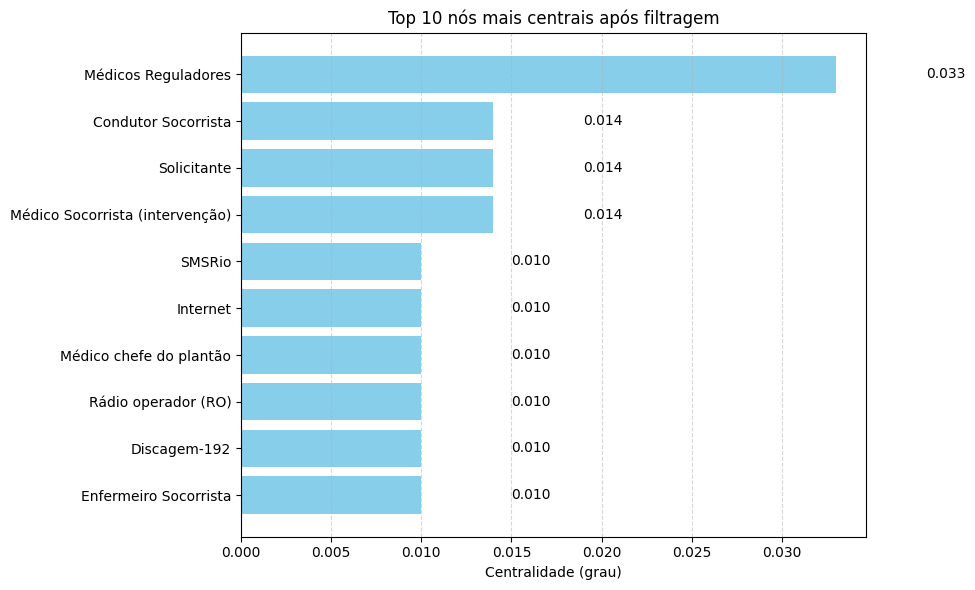

In [14]:
import matplotlib.pyplot as plt

labels = [label for label, _ in top10_filtered]
scores = [score for _, score in top10_filtered]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Centralidade (grau)")
plt.title("Top 10 nós mais centrais após filtragem")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va='center')

plt.tight_layout()
plt.show()

In [15]:
critical_ids = ['elem-iLaHufTq',
                'elem-aN54lrj3',
                'elem-ddEZK32t',
                'elem-iNmV3Bvj']

print("Definindo pesos para conexões críticas existentes no grafo...")

for u, v in G_filtered.edges():
    if (u in critical_ids or v in critical_ids):
        G_filtered[u][v]['weight'] = 10
        print(f"Peso 10 atribuído: {u} → {v}")

Definindo pesos para conexões críticas existentes no grafo...
Peso 10 atribuído: elem-8ECQmvLH → elem-ddEZK32t
Peso 10 atribuído: elem-8ECQmvLH → elem-iNmV3Bvj
Peso 10 atribuído: elem-ddEZK32t → elem-mLx8pv5A
Peso 10 atribuído: elem-ddEZK32t → elem-jctm6cOs
Peso 10 atribuído: elem-ddEZK32t → elem-c9tEQOOd
Peso 10 atribuído: elem-ddEZK32t → elem-3q9Qc2Un
Peso 10 atribuído: elem-iLaHufTq → elem-iNmV3Bvj
Peso 10 atribuído: elem-iLaHufTq → elem-ddEZK32t
Peso 10 atribuído: elem-tYUswrOp → elem-ddEZK32t


In [16]:
G_without_internet = G_filtered.copy()
G_without_internet.remove_node('elem-iLaHufTq')

centrality_after_failure = nx.degree_centrality(G_without_internet)

id_to_label = dict(zip(elements['_id'], elements['attributes.label']))

top10_after_failure = sorted(centrality_after_failure.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nós mais centrais após falha da Internet:")
for node_id, score in top10_after_failure:
    print(f"{id_to_label.get(node_id, node_id)}: {round(score, 3)}")


Top 10 nós mais centrais após falha da Internet:
Médicos Reguladores: 0.029
Condutor Socorrista: 0.014
Solicitante: 0.014
Médico Socorrista (intervenção): 0.014
SMSRio: 0.01
Rádio operador (RO): 0.01
Discagem-192: 0.01
Enfermeiro Socorrista: 0.01
TARM: 0.01
Médico da emergência: 0.005


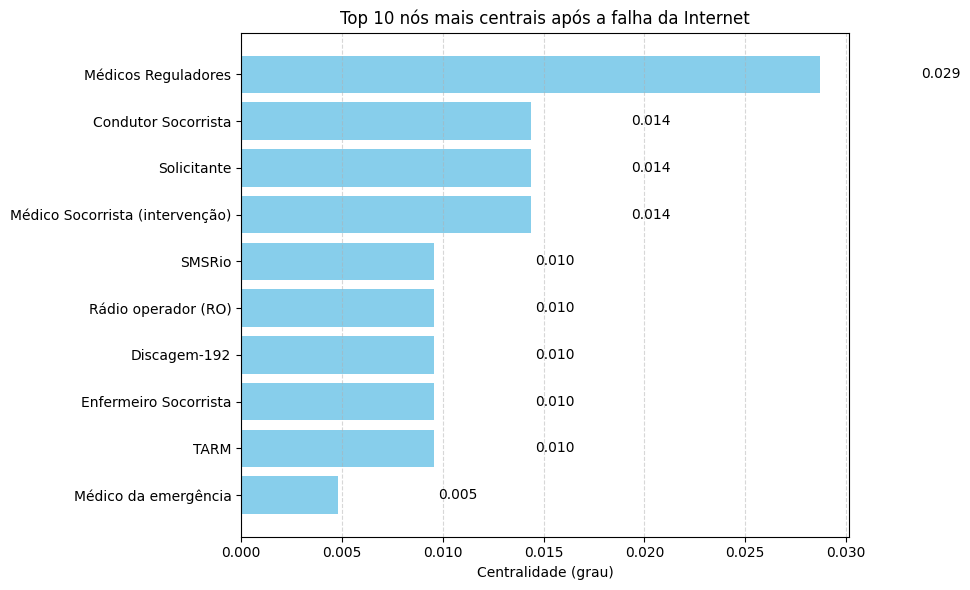

In [17]:
import matplotlib.pyplot as plt

labels = [id_to_label.get(node_id, node_id) for node_id, _ in top10_after_failure]
scores = [score for _, score in top10_after_failure]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Centralidade (grau)")
plt.title("Top 10 nós mais centrais após a falha da Internet")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va='center')

plt.tight_layout()
plt.show()

In [18]:
G_IoT = G_filtered.copy()
G_IoT.remove_node('elem-iLaHufTq')

G_IoT.add_node('elem-IoT')
G_IoT.add_edge('elem-IoT', 'elem-ddEZK32t')
G_IoT.add_edge('elem-IoT', 'elem-iNmV3Bvj')

centrality_with_IoT = nx.degree_centrality(G_IoT)

id_to_label = dict(zip(elements['_id'], elements['attributes.label']))

top10_with_IoT = sorted(centrality_with_IoT.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nós mais centrais após a adoção do IoT:")
for node_id, score in top10_with_IoT:
    print(f"{id_to_label.get(node_id, node_id)}: {round(score, 3)}")


Top 10 nós mais centrais após a adoção do IoT:
Médicos Reguladores: 0.033
Condutor Socorrista: 0.014
Solicitante: 0.014
Médico Socorrista (intervenção): 0.014
SMSRio: 0.01
Médico chefe do plantão: 0.01
Rádio operador (RO): 0.01
Discagem-192: 0.01
Enfermeiro Socorrista: 0.01
TARM: 0.01


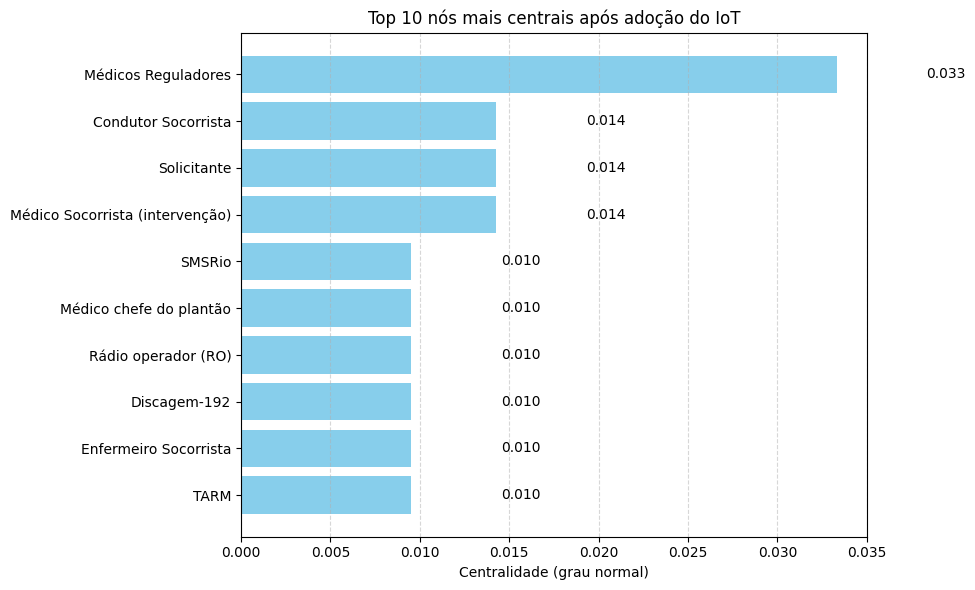

In [19]:
import matplotlib.pyplot as plt

centrality_iot = nx.degree_centrality(G_IoT)

top10_iot = sorted(centrality_iot.items(), key=lambda x: x[1], reverse=True)[:10]

labels = [id_to_label.get(node_id, node_id) for node_id, _ in top10_iot]
scores = [score for _, score in top10_iot]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Centralidade (grau normal)")
plt.title("Top 10 nós mais centrais após adoção do IoT")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va='center')

plt.tight_layout()
plt.show()

In [20]:
G_unidades_saude = G_filtered.copy()
unidades_saude = [
    'elem-4daCpnFb',  # Hospitais municipais
    'elem-zqlCIjDn',  # Hospitais estaduais
    'elem-UsvRsKrp',  # UPAs municipais
    'elem-2VguqDzs',  # UPAs estaduais
    'elem-gbDGgChq',  # UBS e Clínicas da Família
]

import itertools
for u1, u2 in itertools.combinations(unidades_saude, 2):
    if not G_unidades_saude.has_edge(u1, u2):
        G_unidades_saude.add_edge(u1, u2)

centrality_unidades_saude = nx.degree_centrality(G_unidades_saude)

top10_unidades_saude = sorted(centrality_unidades_saude.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nós mais centrais após a simulação de rede regional integrada:")
for node_id, score in top10_unidades_saude:
    print(f"{id_to_label.get(node_id, node_id)}: {round(score, 3)}")


Top 10 nós mais centrais após a simulação de rede regional integrada:
Médicos Reguladores: 0.033
UPAs estaduais: 0.019
Hospitais municipais: 0.019
UPAs municipais: 0.019
UBS e Clínicas da Família: 0.019
Hospitais estaduais: 0.019
Condutor Socorrista: 0.014
Solicitante: 0.014
Médico Socorrista (intervenção): 0.014
SMSRio: 0.01


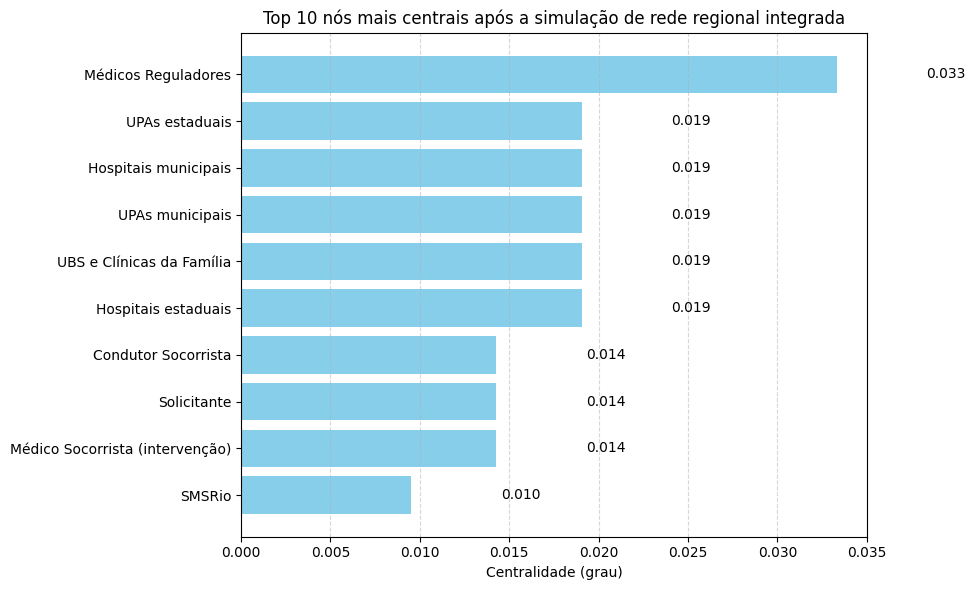

In [21]:
import matplotlib.pyplot as plt

centrality_unidades_saude_plot = nx.degree_centrality(G_unidades_saude)

top10_unidades_saude_plot = sorted(centrality_unidades_saude_plot.items(), key=lambda x: x[1], reverse=True)[:10]

labels = [id_to_label.get(node_id, node_id) for node_id, _ in top10_unidades_saude_plot]
scores = [score for _, score in top10_unidades_saude_plot]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Centralidade (grau)")
plt.title("Top 10 nós mais centrais após a simulação de rede regional integrada")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va='center')

plt.tight_layout()
plt.show()

In [22]:
pressure_factor = 1.5

for node in G_filtered.nodes():
    if 'elem-15WDuhbf' in str(node):
        for neighbor in G_filtered.neighbors(node):
            G_filtered[node][neighbor]['weight'] = G_filtered[node][neighbor].get('weight', 1) * pressure_factor

In [23]:
weighted_degrees = dict(G_filtered.degree(weight='weight'))

max_degree = max(weighted_degrees.values())
normalized_centrality = {k: v / max_degree for k, v in weighted_degrees.items()}

top10_weighted = sorted(normalized_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nós mais centrais após aumento de pressão (considerando pesos):")
for node_id, score in top10_weighted:
    print(f"{id_to_label.get(node_id, node_id)}: {round(score, 3)}")


Top 10 nós mais centrais após aumento de pressão (considerando pesos):
Médicos Reguladores: 1.0
SMSRio: 0.286
Internet: 0.286
Médico chefe do plantão: 0.286
Solicitante: 0.171
Médico Socorrista (intervenção): 0.171
Rádio operador (RO): 0.157
Enfermeiro Socorrista: 0.157
TARM: 0.157
Condutor Socorrista: 0.043


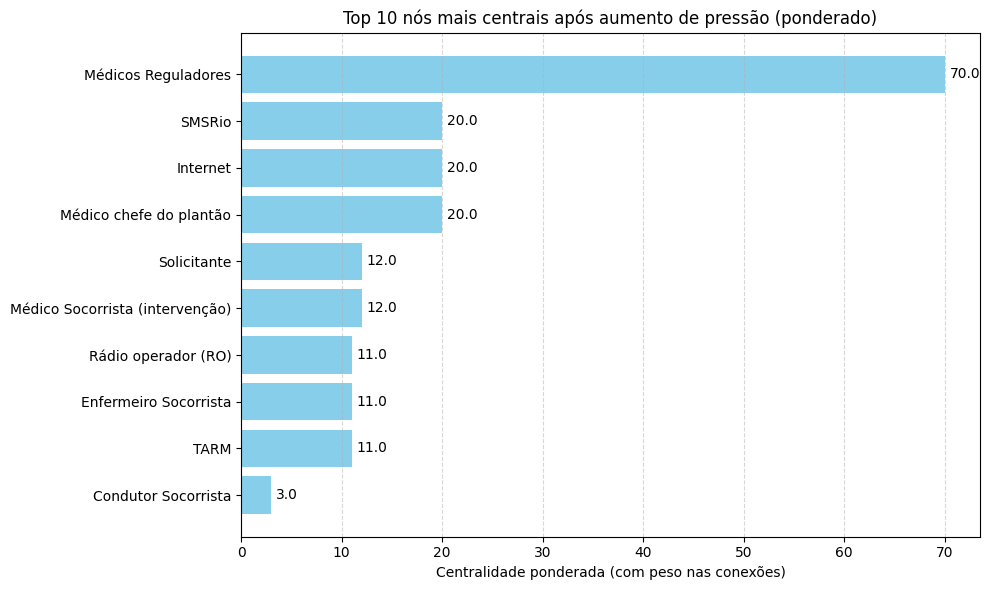

In [24]:
import matplotlib.pyplot as plt

# Use G_filtered which contains the updated weights
centrality_with_pressure = dict(G_filtered.degree(weight='weight'))

top10_with_pressure = sorted(centrality_with_pressure.items(), key=lambda x: x[1], reverse=True)[:10]

labels = [id_to_label.get(node_id, node_id) for node_id, _ in top10_with_pressure]
scores = [score for _, score in top10_with_pressure]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='skyblue')
plt.xlabel("Centralidade ponderada (com peso nas conexões)")
plt.title("Top 10 nós mais centrais após aumento de pressão (ponderado)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    plt.text(score + 0.5, bar.get_y() + bar.get_height()/2,
             f"{score:.1f}", va='center')

plt.tight_layout()
plt.show()

In [25]:
centrality_normalized = nx.degree_centrality(G_filtered)

centrality_weighted = dict(G_filtered.degree(weight='weight'))

top10_nodes = sorted(centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:10]
top10_ids = [node_id for node_id, _ in top10_nodes]

labels = [id_to_label.get(node_id, node_id) for node_id in top10_ids]
weighted_scores = [centrality_weighted[node_id] for node_id in top10_ids]
normalized_scores = [centrality_normalized.get(node_id, 0) for node_id in top10_ids]

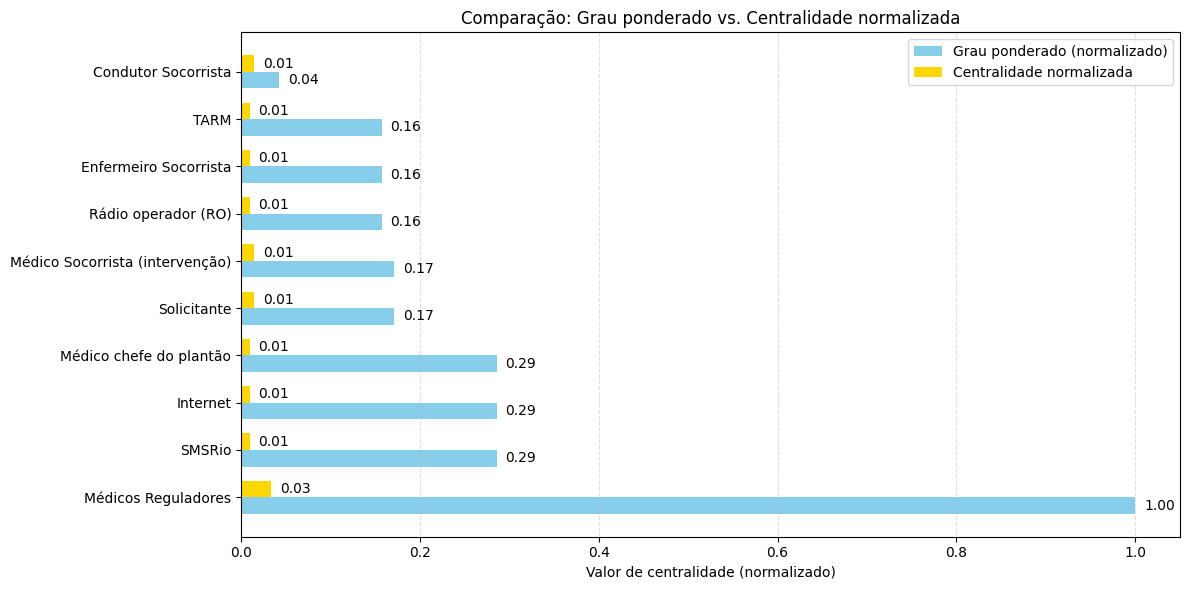

In [26]:
import numpy as np
import matplotlib.pyplot as plt

max_weighted = max(weighted_scores)
weighted_scores_norm = [w / max_weighted for w in weighted_scores]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.barh(x - width/2, weighted_scores_norm, width, label='Grau ponderado (normalizado)', color='skyblue')
bars2 = plt.barh(x + width/2, normalized_scores, width, label='Centralidade normalizada', color='gold')

plt.yticks(x, labels)
plt.xlabel('Valor de centralidade (normalizado)')
plt.title('Comparação: Grau ponderado vs. Centralidade normalizada')
plt.legend()

# Adiciona rótulos nas barras
for i, (w, n) in enumerate(zip(weighted_scores_norm, normalized_scores)):
    plt.text(w + 0.01, i - width/2, f'{w:.2f}', va='center')
    plt.text(n + 0.01, i + width/2, f'{n:.2f}', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()